In [48]:
from keras.datasets import mnist

from keras import models

from keras import layers

from keras.utils import to_categorical

In [61]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [62]:
myNetwork = models.Sequential()
myNetwork.add(layers.Dense(784,activation='relu',input_shape=(28*28,)))
myNetwork.add(layers.Dense(784,activation='relu',input_shape=(28*28,)))
myNetwork.add(layers.Dense(10,activation='softmax'))
myNetwork.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [64]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [65]:
myNetwork.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 16s 34ms/step - loss: 0.1939 - accuracy: 0.9413
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0731 - accuracy: 0.9772
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0479 - accuracy: 0.9846
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0278 - accuracy: 0.9910


In [66]:
myNetwork.fit(train_images,train_labels,epochs=15,batch_size=128)

Epoch 1/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 2/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 4/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 5/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 6/15
469/469 [==============================] - 11s 25ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 8/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 9/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0114 - accuracy: 0.9966
Epoch 10/15
469/469 [==============================] - 12s 25ms/step - loss: 0.010

In [67]:
test_loss,test_acc = myNetwork.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.9814


In [17]:
print('Test accuracy: ', test_acc, 'test_loss', test_loss)

Test accuracy:  0.9814000129699707 test_loss 0.06799034774303436


In [72]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [74]:
model_save_name = 'Jayam_Week7.h5'
path = F"/content/gdrive/My Drive/{model_save_name}"
myNetwork.save(path)

In [78]:
import tensorflow as tf
new_model=tf.keras.models.load_model(path)
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


Enter the URL you would like to download: https://miro.medium.com/max/282/1*xpszL7jJrV5UTV7Xa-fgWQ.png


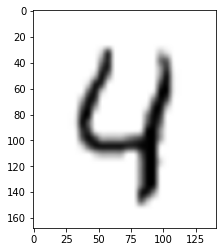

In [79]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

input_image_url = input("Enter the URL you would like to download: ")
image = requests.get(input_image_url)
with open('pic1.jpg', 'wb') as outfile:
    outfile.write(image.content)

img = mpimg.imread('pic1.jpg')
imgplot = plt.imshow(img)
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4  12   1   0   0   0   0   0
    0   4   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3  58 187  14   0   0   0   0   0
    4  64  36   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8 121 209  15   0   0   0   0   0
    9 133 151  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19 184 209  15   0   0   0   0   0
    6 101 191  23   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7  82 229 131   8   0   0   

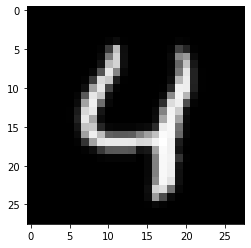

In [80]:
import cv2
import numpy as np
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [81]:
image = image / 255
image = image.reshape(1, 784)
image = image.astype('float32')

prediction = myNetwork.predict_classes(image)
print("predicted digit:", str(prediction))


predicted digit: [4]
